### Źródło danych: 


Do projektu została wykorzystana baza danych pobrana ze strony Kaggle i jest dostępna pod adresem: https://www.kaggle.com/datasets/brijlaldhankour/car-buyers
<br>
Zbiór jest rejestrem 6092 modeli samochodów i składa się z informacji takich jak:
<ul>
    <li>Manufacturer</li>
    <li>Model</li>
    <li>Price</li>
    <li>Transmission</li>
    <li>Power</li>
    <li>Engine CC	</li>
    <li>Fuel</li>
    <li>Male</li>
    <li>Female</li>
    <li>Unknown</li>
    <li>Total</li>
</ul>

### lol

Import Bibliotek

In [914]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

Wczytanie danych

In [915]:
dataSet = pd.read_csv("CarBuyers.csv")

Przejrzenie zawartości bazy danych

In [916]:
dataSet.head()

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Ford,Focus,30.619322,5.966102,94.033898,1497.169492,petrol,814172,422731,"56,487",1293390
1,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,petrol,554879,631666,"54,057",1240602
2,Volkswagen,Golf,31.242154,6.164835,89.461538,1537.406593,petrol,483216,310604,"47,563",841383
3,Renault,Clio,22.100000,5.615385,75.576923,1219.653846,petrol,241287,312556,"28,004",581847
4,BMW,320i,47.848370,6.444444,126.111111,1995.777778,petrol,408016,115843,"29,125",552984


In [917]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  6092 non-null   object 
 1   Model         6092 non-null   object 
 2   Price         6092 non-null   float64
 3   Transmission  6092 non-null   float64
 4   Power         6092 non-null   float64
 5   Engine CC     6092 non-null   float64
 6   Fuel          6092 non-null   object 
 7   Male          6092 non-null   object 
 8   Female        6092 non-null   object 
 9   Unknown       6092 non-null   object 
 10  Total         6092 non-null   object 
dtypes: float64(4), object(7)
memory usage: 523.7+ KB


Zmienne typu <i>object</i> takie jak <i>Male, Female, Unknow, Total</i> możemy zmienić na typ <i>int</i>

In [918]:

dataSet.info()
for i in range(len(dataSet)):
    male = str(dataSet.loc[i, "Male"]).replace(",","")
    female = str(dataSet.loc[i, "Female"]).replace(",","")
    unknown = str(dataSet.loc[i, "Unknown"]).replace(",","")
    total = str(dataSet.loc[i, "Total"]).replace(",","")
    
    dataSet.loc[i, "Male"] = male
    dataSet.loc[i, "Female"] = female
    dataSet.loc[i, "Unknown"] = unknown
    dataSet.loc[i, "Total"] = total


dataSet = dataSet.astype({"Fuel": "str", "Male": "int", "Female": "int", "Unknown": "int", "Total": "int"})
dataSet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  6092 non-null   object 
 1   Model         6092 non-null   object 
 2   Price         6092 non-null   float64
 3   Transmission  6092 non-null   float64
 4   Power         6092 non-null   float64
 5   Engine CC     6092 non-null   float64
 6   Fuel          6092 non-null   object 
 7   Male          6092 non-null   object 
 8   Female        6092 non-null   object 
 9   Unknown       6092 non-null   object 
 10  Total         6092 non-null   object 
dtypes: float64(4), object(7)
memory usage: 523.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  6092 non-null   object 
 1   Model         6092 non-null   object 
 

Wykres ilości modeli danej marki

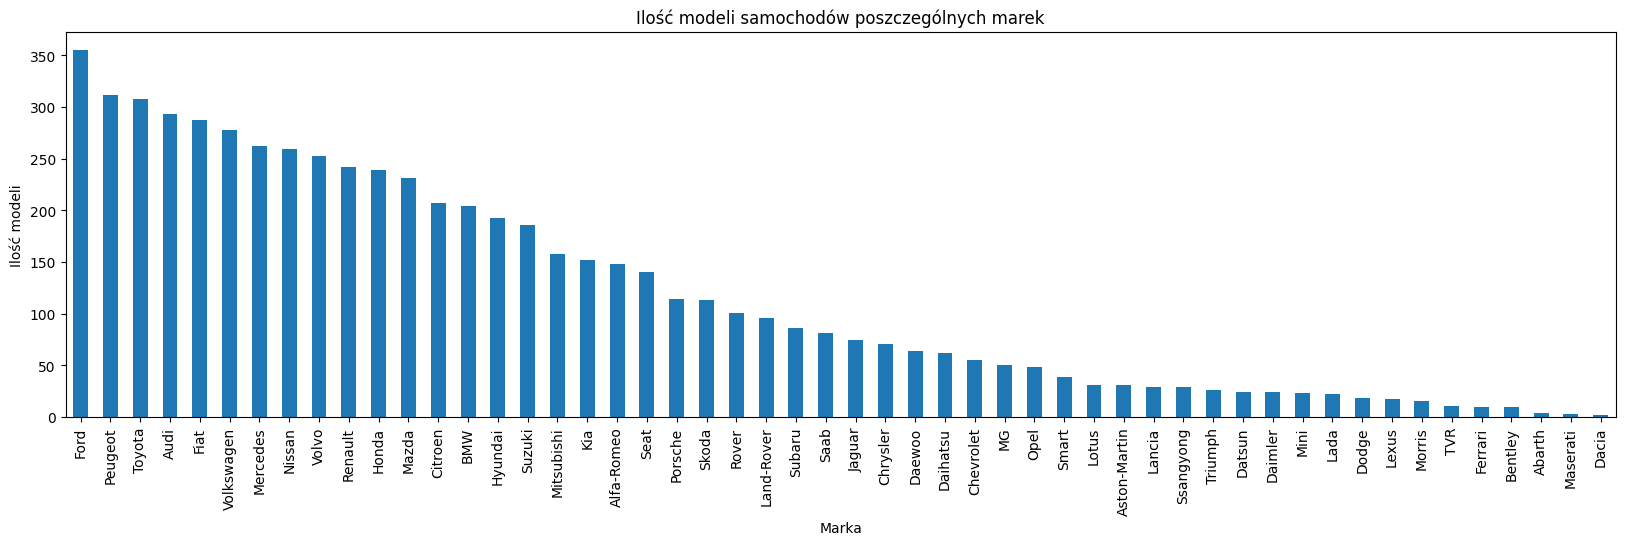

In [919]:
listOfUniqueBrands = dataSet["Manufacturer"].unique().tolist()
listOfBrands = dataSet["Manufacturer"].tolist()
a = dataSet["Manufacturer"].value_counts()
a.plot.bar(title="Ilość modeli samochodów poszczególnych marek", figsize=(20,5), xlabel="Marka", ylabel="Ilość modeli")

# fig, axes = plt.subplots(figsize=(20,5))
# g = sb.countplot(x="Manufacturer", data=dataSet)
# g.set_title("Ilość zakupionych aut danej marki")
# g.set_xlabel("Marka")
# g.set_ylabel("Ilość samochodów")

# fig, axes = plt.subplots(figsize=(10,5))
# g = sns.countplot(x='Children', data=df, palette='Paired')
# g.set_title('Ilość osób z x dziećmi')
# g.set_xlabel('Ilość Dzieci')
# g.set_ylabel('Ilość obserwacji')

plt.show()


In [920]:
len(dataSet["Model"].unique().tolist())
#dataSet[dataSet["Model"]=="Space"]

501

In [921]:
dataSet["Model"].value_counts()

Model
Space        49
Range        40
CLA          33
2000         31
Cabriolet    26
             ..
M135i         1
XV            1
John          1
CC            1
504           1
Name: count, Length: 501, dtype: int64

In [922]:
dataSetUnique = pd.DataFrame()
for column in dataSet.columns:
    dataSetUnique[column]=[]
dataSetUnique.loc[0] = dataSet.loc[0]
models = ["Ford"]

indexForNewRow = 1

for i in range(1, len(dataSet)):
    row = dataSet.loc[i]
    if row["Model"] in models:
        index = models.index(row["Model"])
        dataSetUnique.loc[index, "Male"] += row["Male"]
        
    else:
        models.append(row["Model"])
        dataSetUnique.loc[indexForNewRow]=row
        position += 1
dataSetUnique



KeyError: 13